# Project: University clustering prediction model
By: odubajo abdul qoyyum
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>     
    <li><a href="#assessing">Data Assessing</a></li>  
    <li><a href="#analysis">EDA</a></li>
    <li><a href="#conclusion">data preparation and model building

### Introduction

> For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

> We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student


### Import all packages and set plots to be embedded inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DATA ASSESSING

In [2]:
df_college = pd.read_csv('College_Data',index_col=0)
df_college.sample(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College of Saint Benedict,Yes,938,864,511,29,62,1715,103,12247,4221,500,600,70,88,13.1,26,8847,72
Lehigh University,Yes,6397,4304,1092,40,84,4298,132,18700,5580,750,1130,96,99,12.5,43,14665,91
Immaculata College,Yes,268,253,103,16,44,494,1305,10000,5364,500,1000,56,64,11.2,33,7305,69
Barat College,Yes,261,192,111,15,36,453,266,9690,4300,500,500,57,77,9.7,35,9337,71
Saint Joseph's University,Yes,2519,2003,776,39,71,2473,1314,12750,6350,350,1690,84,90,17.4,13,8243,83
Antioch University,Yes,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48
University of Hawaii at Manoa,No,3580,2603,1627,36,69,11028,2411,4460,3038,687,1281,85,87,11.8,6,12833,54
North Adams State College,No,1563,1005,240,1,19,1380,136,5542,4330,500,1000,65,71,14.2,17,6562,57
Bethel College,Yes,502,384,104,11,28,347,74,6200,2900,600,800,63,63,11.7,13,7623,35
University of Charleston,Yes,682,535,204,22,43,771,611,9500,3540,400,750,26,58,2.5,10,7683,57


In [3]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

###  Exploratory Data Analysis

C:\Users\qoyyum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\qoyyum\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


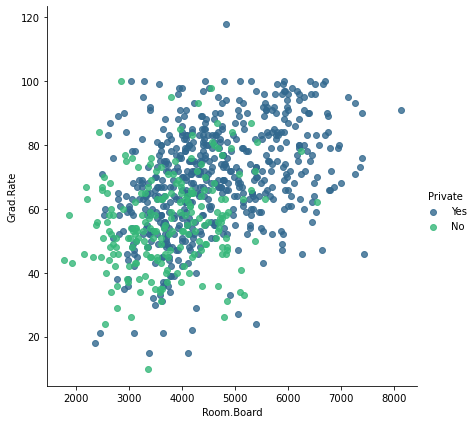

In [4]:
# creating a scatterplot of room board vs graduation rate for the private column

sns.lmplot('Room.Board','Grad.Rate',data=df_college, palette= 'viridis', hue='Private',
           size=6,aspect=1,fit_reg=False)

C:\Users\qoyyum\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


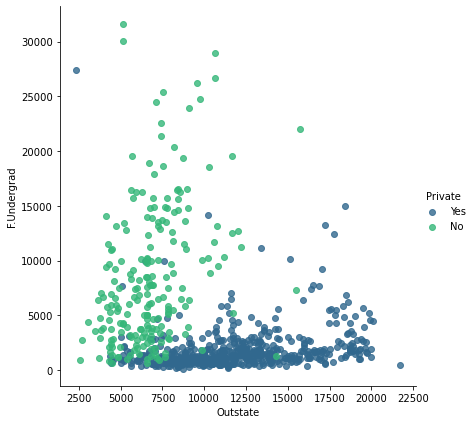

In [7]:
# creating a scatterplot of of F.Undergrad versus Outstate colored by Private column

sns.lmplot('Outstate','F.Undergrad',data=df_college, palette='viridis', 
           hue='Private', size=6,aspect=1,fit_reg=False)

In [ ]:
#creating an histogram for the graduation rate by private column

g = sns.FacetGrid(df_college,hue="Private",palette='viridis',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

> there seems to be a private school with a graduation rate of higher than 100%. we will drop it

In [ ]:
df_college=df_college[df_college['Grad.Rate'] <= 100]

### Model building using KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
model.fit(df_college.drop('Private',axis=1))

In [ ]:
model.labels_